In [424]:
import pandas as pd
import os.path
import geopandas as gpd
import matplotlib.pyplot as plt

In [425]:
path = os.getcwd() + ".\\files\lego_sets.csv"
data = pd.read_csv(path)
data.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  float64
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


In [426]:
data = data.drop('prod_long_desc', axis=1)


In [427]:
country_counts = data['country'].value_counts()

# Display the result
print(country_counts)

country
US    817
CA    815
NL    576
GB    576
AT    575
DN    575
AU    570
IE    569
CH    568
FR    568
BE    566
NZ    565
IT    550
LU    549
NO    549
FI    549
ES    549
DE    549
CZ    549
PT    547
PL    530
Name: count, dtype: int64


In [428]:
data = data.groupby('prod_id').filter(lambda x: x['prod_id'].count() == len(data['country'].unique()))

# Display the result
print(data)

       ages  list_price  num_reviews  piece_count  play_star_rating  \
3       12+     99.9900         23.0       1032.0               3.6   
4       12+     79.9900         14.0        744.0               3.2   
5       12+     59.9900          7.0        597.0               3.7   
6       12+     59.9900         37.0        598.0               3.7   
7       12+     49.9900         24.0        780.0               4.4   
...     ...         ...          ...          ...               ...   
12233  8-14     42.6878         24.0        305.0               4.5   
12236  7-14     30.4878          8.0        204.0               4.1   
12237  7-14     30.4878         19.0        201.0               4.1   
12238  6-12     18.2878          7.0        141.0               4.0   
12239  6-12     18.2878         18.0        124.0               4.5   

                                               prod_desc  prod_id  \
3      Explore the architecture of the United States ...  21030.0   
4      Re

In [429]:
data['average_prices'] = data.groupby('country')['list_price'].transform('mean')
average_prices = data[['average_prices','country']]
iso_a2_to_iso_a3 = {
    'AT': 'AUT', 'AU': 'AUS', 'BE': 'BEL', 'CA': 'CAN', 'CH': 'CHE',
    'CZ': 'CZE', 'DE': 'DEU', 'DN': 'DNK', 'ES': 'ESP', 'FI': 'FIN',
    'FR': 'FRA', 'GB': 'GBR', 'IE': 'IRL', 'IT': 'ITA', 'LU': 'LUX',
    'NL': 'NLD', 'NO': 'NOR', 'NZ': 'NZL', 'PL': 'POL', 'PT': 'PRT',
    'US': 'USA'
}

# Convert 'iso_a2' to 'iso_a3' using the mapping dictionary
average_prices['country'] = average_prices['country'].map(iso_a2_to_iso_a3)

# Display the result
print(average_prices)
print(average_prices.columns)


       average_prices country
3           61.909948     USA
4           61.909948     USA
5           61.909948     USA
6           61.909948     USA
7           61.909948     USA
...               ...     ...
12233       76.365916     PRT
12236       76.365916     PRT
12237       76.365916     PRT
12238       76.365916     PRT
12239       76.365916     PRT

[8001 rows x 2 columns]
Index(['average_prices', 'country'], dtype='object')


C:\Users\augus\AppData\Local\Temp\ipykernel_21084\3894994278.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  average_prices['country'] = average_prices['country'].map(iso_a2_to_iso_a3)


In [430]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(world.columns)

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')


C:\Users\augus\AppData\Local\Temp\ipykernel_21084\3529209966.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


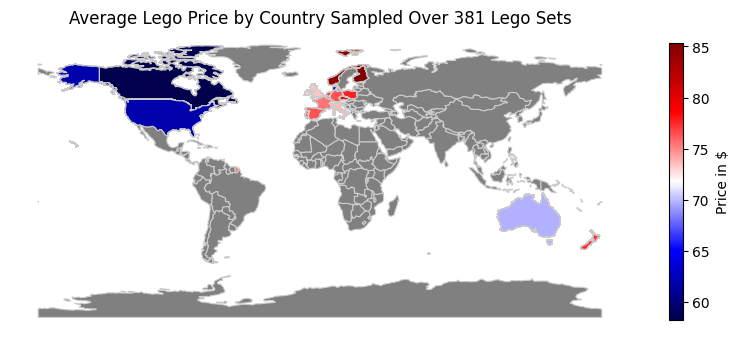

In [431]:
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize



# Assuming 'average_prices' is a DataFrame with 'country' and 'price' columns
# Display the first few rows of the DataFrame

# Merge the GeoDataFrame with average prices, filling NaN with numpy.nan
world_prices = world.merge(average_prices, left_on='iso_a3', right_on='country', how='left')

# Plot the map

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

world_prices.plot(column='average_prices', cmap='seismic', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,missing_kwds={'color': 'gray'}, legend_kwds={'shrink': 0.6,'label': "Price in $"})

# Set the font size of the legend

ax.set_title('Average Lego Price by Country Sampled Over 381 Lego Sets')
ax.set_axis_off()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  float64
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  float64
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB

<class 'pandas.core.frame.DataFrame'>
Index: 8001 entries, 3 to 12239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               8001 non-null   object 
 1   list_price         8001 non-null   float64
 2   num_reviews        7027 non-null   float64
 3   piece_count        8001 non-null   float64
 4   play_star_rating   6958 non-null   float64
 5   prod_desc          7688 non-null   object 
 6   prod_id            8001 non-null   float64
 7   review_difficulty  6853 non-null   object 
 8   set_name           8001 non-null   object 
 9   star_rating        7027 non-null   float64
 10  theme_name         7999 non-null   object 
 11  val_star_rating    6958 non-null   float64
 12  country            8001 non-null   object 
 13  average_prices     8001 non-null   float64
 14  x                  8001 non-null   float64
 15  y                  8001 non-null   float64
dtypes: float64(10), object(6)
me

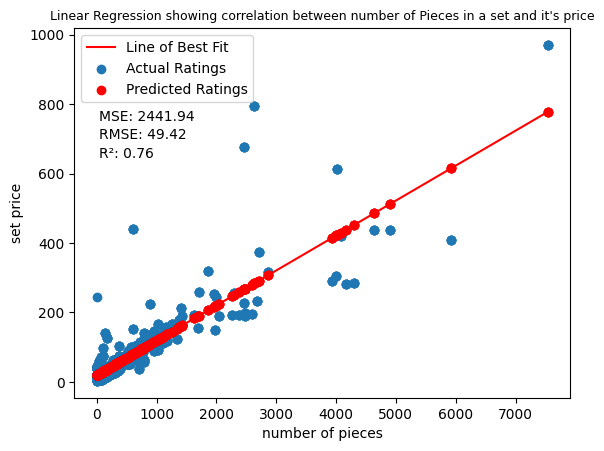

In [432]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.metrics import r2_score



data['x'] = data.groupby('prod_id')['piece_count'].transform('mean')
data['y'] = data.groupby('prod_id')['list_price'].transform('mean')
x = data['x']
y = data['y']
data.info()
x = x.values.reshape(-1, 1)


# Define a threshold for Z-score (e.g., 3, which is a common threshold)

# Filter out rows where the absolute Z-score is greater than the threshold
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=x,random_state=42)

# Fit linear regression model on the polynomial features
model = LinearRegression()


# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

line_x = np.linspace(min(x), max(x), 100)
line_y = model.predict(line_x)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error: {mse}')
print(f'root Mean Squared Error: {rmse}')
print(f'R-squared (R²): {r2}')


#['piece_count', 'list_price', 'country', 'theme_name']
# Plot the polynomial regression curve
plt.plot(line_x, line_y, color='red', label='Line of Best Fit')
plt.scatter(X_test, y_test, label='Actual Ratings')
plt.scatter(X_test, y_pred, color='red', label='Predicted Ratings')
plt.xlabel('number of pieces')
plt.ylabel('set price')
plt.title('Linear Regression showing correlation between number of Pieces in a set and it\'s price',fontsize=9)
plt.legend()

plt.annotate(f'MSE: {mse:.2f}', xy=(0.05, 0.75), xycoords='axes fraction')
plt.annotate(f'RMSE: {rmse:.2f}', xy=(0.05, 0.7), xycoords='axes fraction')
plt.annotate(f'R²: {r2:.2f}', xy=(0.05, 0.65), xycoords='axes fraction')
plt.show()


In [433]:

# Calculate z-scores for each actual y value

x = data['x']
y = data['y']
x = x.values.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

data['residuals'] = y - model.predict(x)
data.info()
residuals = data['residuals']

mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
# Print or use the z-scores for further analysis
threshold = 3.5  # Adjust as needed

# Filter out outliers based on the threshold
filtered_indices = np.abs(residuals) <= threshold * std_residual
filtered_data = data[filtered_indices]

filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8001 entries, 3 to 12239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               8001 non-null   object 
 1   list_price         8001 non-null   float64
 2   num_reviews        7027 non-null   float64
 3   piece_count        8001 non-null   float64
 4   play_star_rating   6958 non-null   float64
 5   prod_desc          7688 non-null   object 
 6   prod_id            8001 non-null   float64
 7   review_difficulty  6853 non-null   object 
 8   set_name           8001 non-null   object 
 9   star_rating        7027 non-null   float64
 10  theme_name         7999 non-null   object 
 11  val_star_rating    6958 non-null   float64
 12  country            8001 non-null   object 
 13  average_prices     8001 non-null   float64
 14  x                  8001 non-null   float64
 15  y                  8001 non-null   float64
 16  residuals          8001 non-

Mean Squared Error: 545.1519483265432
Root Mean Squared Error: 23.348489208652094
R-squared (R²): 0.8815221689707274


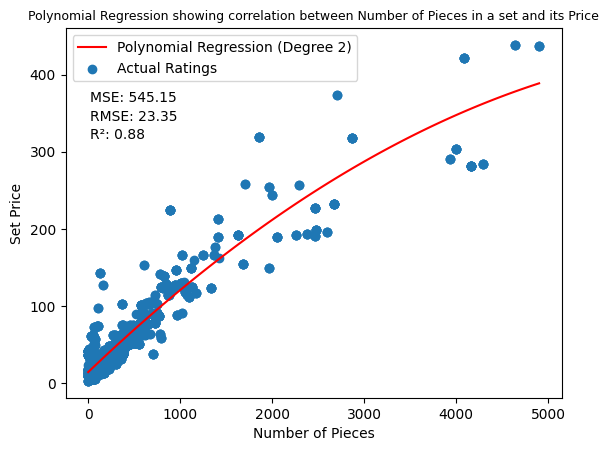

In [434]:
from sklearn.preprocessing import PolynomialFeatures


x = filtered_data['x']
y = filtered_data['y']

# Reshape x to a 2D array as required by scikit-learn
x = x.values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Choose the degree of the polynomial (adjust as needed)
degree = 2

# Generate polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Generate points for the polynomial curve
line_x = np.linspace(min(x), max(x), 100).reshape(-1, 1)
line_x_poly = poly.transform(line_x)

# Predict the values for the polynomial curve
line_y = model.predict(line_x_poly)

# Evaluate the model using metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R²): {r2}')

# Plot the polynomial regression curve
plt.plot(line_x, line_y, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.scatter(X_test, y_test, label='Actual Ratings')
plt.xlabel('Number of Pieces')
plt.ylabel('Set Price')
plt.title('Polynomial Regression showing correlation between Number of Pieces in a set and its Price',fontsize=9)
plt.legend()

plt.annotate(f'MSE: {mse:.2f}', xy=(0.05, 0.8), xycoords='axes fraction')
plt.annotate(f'RMSE: {rmse:.2f}', xy=(0.05, 0.75), xycoords='axes fraction')
plt.annotate(f'R²: {r2:.2f}', xy=(0.05, 0.7), xycoords='axes fraction')
plt.show()


In [435]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'df' is your DataFrame
# Perform preprocessing steps
filtered_data = filtered_data.dropna(subset=['star_rating','piece_count', 'list_price', 'country', 'theme_name','review_difficulty'])

filtered_data['average_prices'] = data.groupby('prod_id')['list_price'].transform('mean')
filtered_data['average_star_rating'] = data.groupby('prod_id')['star_rating'].transform('mean')

# Convert categorical variables to numerical using one-hot encoding
label_encoder = LabelEncoder()
filtered_data['country'] = label_encoder.fit_transform(filtered_data['country'])
filtered_data['theme_name_encoded'] = label_encoder.fit_transform(filtered_data['theme_name'])
filtered_data['review_difficulty'] = label_encoder.fit_transform(filtered_data['review_difficulty'])



# Split the data into features (X) and target variable (y)
x = filtered_data[['piece_count', 'average_prices', 'theme_name_encoded','review_difficulty']]
y = filtered_data['average_star_rating']
x.info()
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)


# Polynomial regression
degree = 4  # You can change the degree as needed
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)

# Fit linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions on the test set
X_poly_test = poly_features.transform(X_test)
y_pred = poly_model.predict(X_poly_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
y_range = np.ptp(y)

# Calculate the mean
y_mean = np.mean(y)

print(f'Range of average star rating: {y_range}')
print(f'Mean of average star rating: {y_mean}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R²): {r2}')




<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 3 to 12239
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   piece_count         6704 non-null   float64
 1   average_prices      6704 non-null   float64
 2   theme_name_encoded  6704 non-null   int32  
 3   review_difficulty   6704 non-null   int32  
dtypes: float64(2), int32(2)
memory usage: 209.5 KB
Range of average star rating: 3.1999999999999997
Mean of average star rating: 4.5113812649164675
Mean Squared Error: 0.21974950013061553
Root Mean Squared Error: 0.4687744661674903
R-squared (R²): 0.17901185425324684


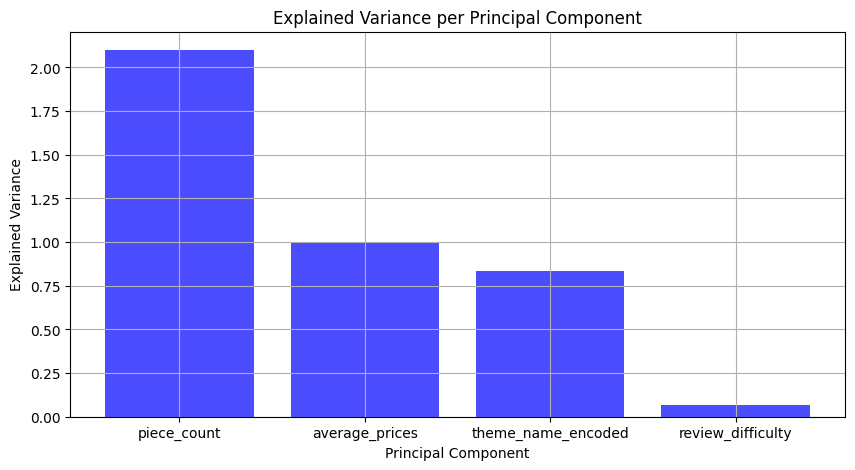

In [436]:

from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance per principal component with labels

explained_var = pca.explained_variance_
component_labels = x.columns

plt.figure(figsize=(10, 5))
plt.bar(component_labels, explained_var, color='b', alpha=0.7, align='center')
plt.title('Explained Variance per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

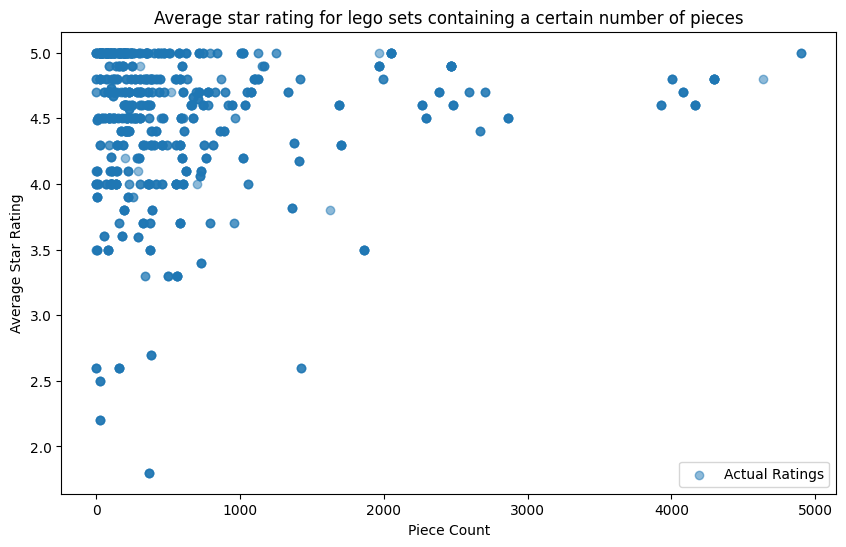

In [437]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['piece_count'], y_test, alpha=0.5, label='Actual Ratings')

# Sort values for a smooth line

# Set labels and title
plt.xlabel('Piece Count')
plt.ylabel('Average Star Rating')
plt.title('Average star rating for lego sets containing a certain number of pieces')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [438]:
themes_unique = filtered_data['theme_name'].unique().tolist()

# Print the list of unique themes
print(themes_unique)

['Architecture', 'BrickHeadz', 'City', 'Classic', 'Creator 3-in-1', 'Creator Expert', 'DC Comics™ Super Heroes', 'Disney™', 'DUPLO®', 'Elves', 'Friends', 'Ghostbusters™', 'Ideas', 'Juniors', 'Indoraptor Rampage at Lockwood Estate', 'Jurassic Park Velociraptor Chase', 'Dilophosaurus Outpost Attack', 'Stygimoloch Breakout', 'Pteranodon Chase', 'Marvel Super Heroes', 'MINDSTORMS®', 'Minecraft™', 'Minifigures', 'NEXO KNIGHTS™', 'NINJAGO®', 'SERIOUS PLAY®', 'Speed Champions', 'Star Wars™', 'Technic', 'Power Functions', 'THE LEGO® BATMAN MOVIE', 'Carnotaurus Gyrosphere Escape', 'LEGO® Creator 3-in-1']
